# Titanic survival

## 1 . Problem definition
Predict the survival of people onboard the Titanic (binary classification)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import ensemble

## 2. Load data


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Extra info:
April 15, 1912
1502 deaths out of 2224 (passengers and crew) (32% survival rate)
not enough lifeboats
More likely to survive: women, children, upper-class

## 3. Exploratory Analysis

Familiarize with the data: nb of examples, nb of columns, data types, ranges of values, distributions, missing values

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


-> Columns containing NaN: Age, Cabin, Embarked, Fare

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slayter, Miss. Hilda Mary",male,1601,B96 B98,S
freq,1,577,7,4,644


-> Names are unique, Sex is binary, duplicate values for Tickets and Cabin

Look for NaN, zeros, typos, other possible classes at test time:

In [10]:
for set_name, data in [('training set', train_data), ('test set',test_data)]:
    print('\n' + '-'*15)
    print(set_name)
    print('-'*15)
    print('\nValues/Ranges:')
    print('  Pclass:  {}'.format(sorted(data.Pclass.unique())))
    print('  Sex:     {}'.format(data.Sex.unique()))
    print('  SibSp:   {}'.format(sorted(data.SibSp.unique())))
    print('  Parch:   {}'.format(sorted(data.Parch.unique())))
    print('  PassengerId:[{},{}]'.format(data.PassengerId.min(), data.PassengerId.max()))
    print('  Age:     [{},{}]'.format(data.Age.min(), data.Age.max()))
    print('  Fare:    [{},{}]'.format(data.Fare.min(), data.Fare.max()))
    print('  Embarked:{}'.format(data.Embarked.unique()))
    # print('Name :  {}'.format(data.Name.unique()))
    # print('Ticket :{}'.format(data.Ticket.unique()))
    # print('Cabin :{}'.format(data.Cabin.unique()))
    print('\nNaN counts:')
    for column_name in list(data.columns):
        nan_count = data[column_name].isna().sum()
        if nan_count != 0:
            print('  {}: {}'.format(column_name, nan_count))
    print('  No NaN in other columns')
    
    print('\nZero counts:')
    print('  Age:   {}'.format((data.Age == 0).sum()))
    print('  Ticket:{}'.format((data.Ticket == 0).sum()))
    print('  Fare:  {}'.format((data.Fare == 0).sum()))


---------------
training set
---------------

Values/Ranges:
  Pclass:  [1, 2, 3]
  Sex:     ['male' 'female']
  SibSp:   [0, 1, 2, 3, 4, 5, 8]
  Parch:   [0, 1, 2, 3, 4, 5, 6]
  PassengerId:[1,891]
  Age:     [0.42,80.0]
  Fare:    [0.0,512.3292]
  Embarked:['S' 'C' 'Q' nan]

NaN counts:
  Age: 177
  Cabin: 687
  Embarked: 2
  No NaN in other columns

Zero counts:
  Age:   0
  Ticket:0
  Fare:  15

---------------
test set
---------------

Values/Ranges:
  Pclass:  [1, 2, 3]
  Sex:     ['male' 'female']
  SibSp:   [0, 1, 2, 3, 4, 5, 8]
  Parch:   [0, 1, 2, 3, 4, 5, 6, 9]
  PassengerId:[892,1309]
  Age:     [0.17,76.0]
  Fare:    [0.0,512.3292]
  Embarked:['Q' 'S' 'C']

NaN counts:
  Age: 86
  Fare: 1
  Cabin: 327
  No NaN in other columns

Zero counts:
  Age:   0
  Ticket:0
  Fare:  2


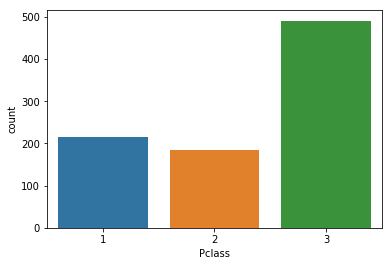

In [11]:
sns.countplot(train_data.Pclass.fillna(value='missing'));

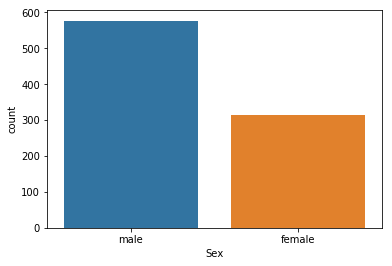

In [12]:
sns.countplot(train_data.Sex.fillna(value='missing'));

/home/diego/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


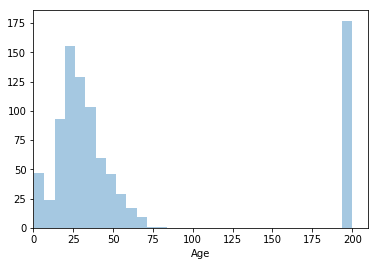

In [13]:
sns.distplot(train_data.Age.fillna(value=200), kde=False);
plt.xlim([0, None]);

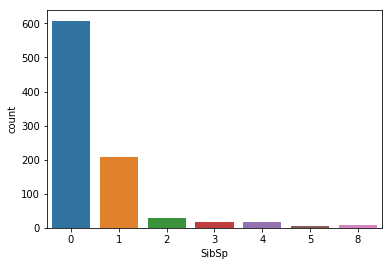

In [14]:
sns.countplot(train_data.SibSp.fillna(value='missing'));

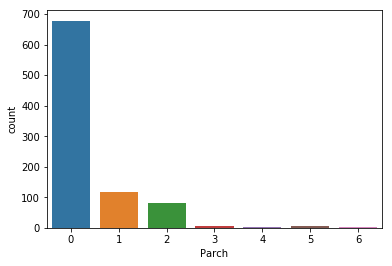

In [15]:
sns.countplot(train_data.Parch.fillna(value='missing'));

/home/diego/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


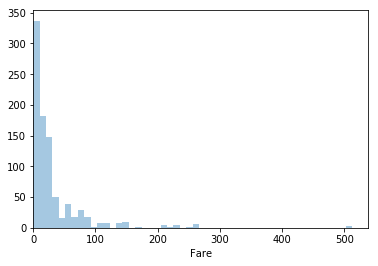

In [16]:
sns.distplot(train_data.Fare.fillna(value=600), kde=False);
plt.xlim([0, None]);

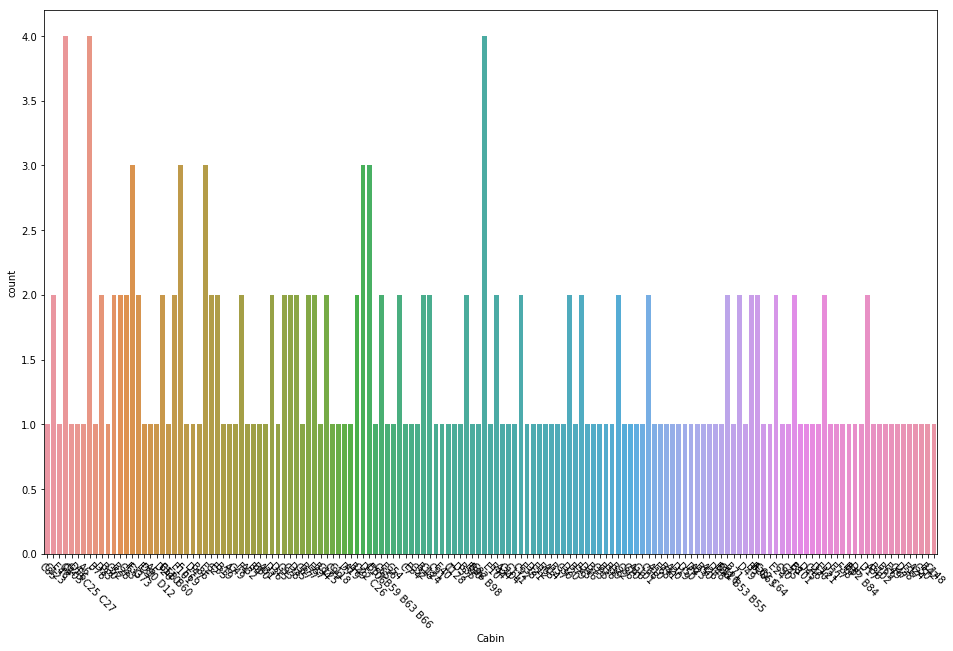

In [17]:
plt.figure(figsize=(16,10))
# sns.countplot(X_train.Cabin.fillna(value='missing'))
sns.countplot(train_data.Cabin)
plt.xticks(rotation=-45);

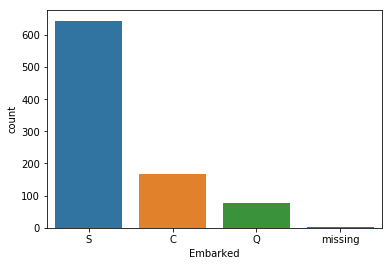

In [18]:
sns.countplot(train_data.Embarked.fillna(value='missing'));

### Correlations of single features to target variable

In [19]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [22]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


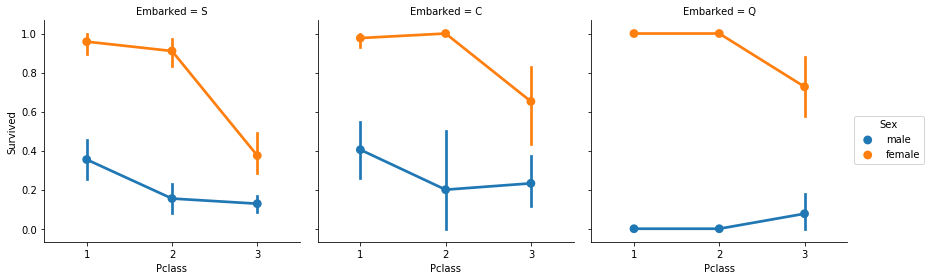

In [24]:
sns.factorplot(x='Pclass',
               y='Survived',
               hue='Sex', col='Embarked', data=train_data,
               kind='point')

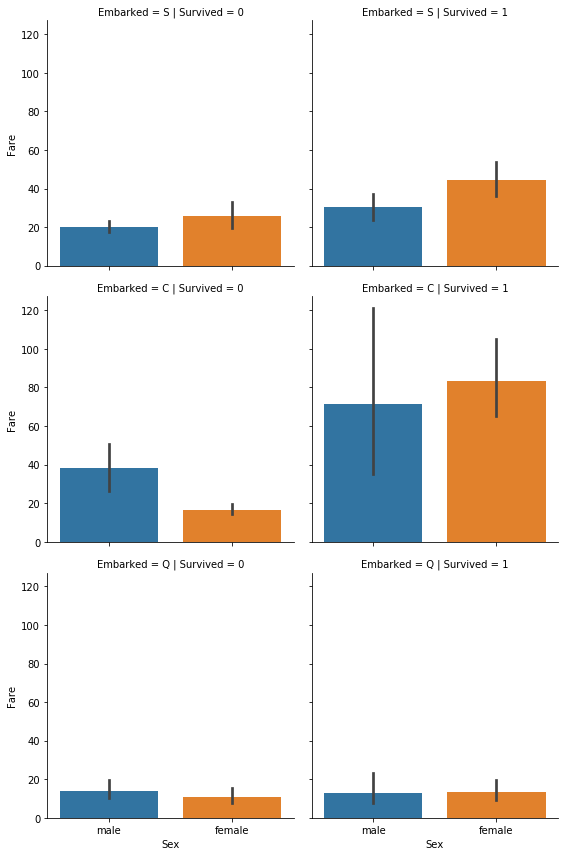

In [25]:
sns.factorplot(x='Sex',
               y='Fare',
#                hue='Sex',
               row= 'Embarked',
               col='Survived', data=train_data,
               kind='bar');

In [26]:
train_data[['Embarked', 'Survived']].loc[train_data['Sex']=='female'].groupby('Embarked').mean()

,Survived
Embarked,
C,0.876712
Q,0.750000
S,0.689655


In [27]:
train_data[['Embarked', 'Survived']].loc[train_data['Sex']=='male'].groupby('Embarked').mean()

,Survived
Embarked,
C,0.305263
Q,0.073171
S,0.174603


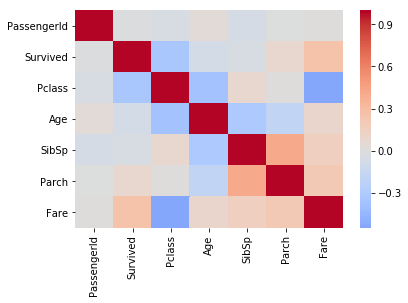

In [28]:
corr = train_data.select_dtypes(include='number').corr()
sns.heatmap(corr, center=0, cmap='coolwarm');

<Figure size 360x144 with 0 Axes>

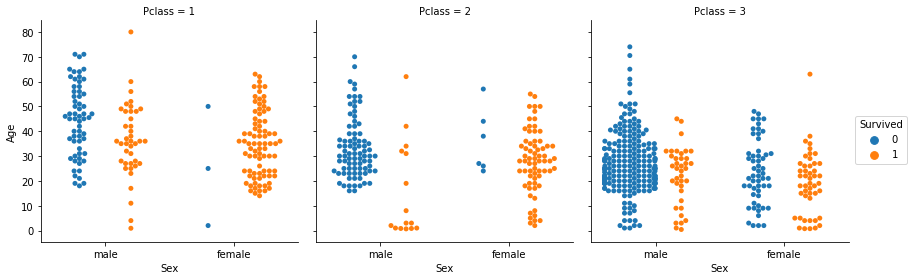

In [29]:
plt.figure(figsize=(5,2));
sns.factorplot(x='Sex', y='Age',
               hue='Survived', col='Pclass', data=train_data,
               kind='swarm', dodge=True);

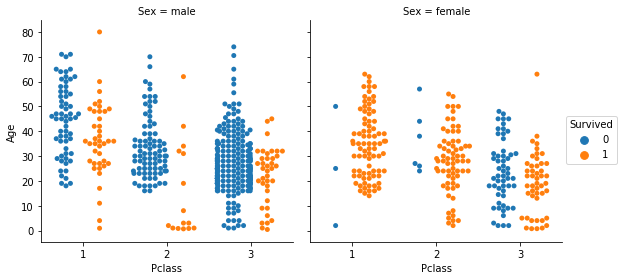

In [30]:
sns.factorplot(x='Pclass',
               y='Age',
               hue='Survived', col='Sex', data=train_data,
               kind='swarm', dodge=True);

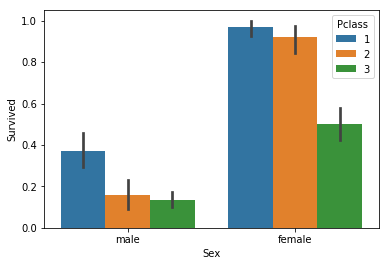

In [31]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data);

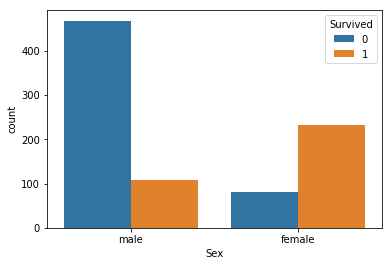

In [32]:
sns.countplot(x='Sex', hue='Survived', data=train_data);

<Figure size 360x144 with 0 Axes>

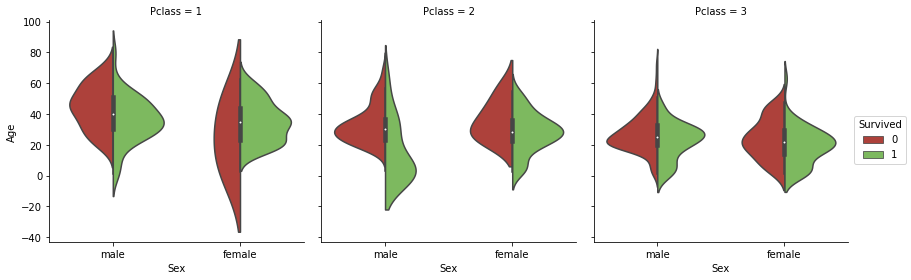

In [33]:
plt.figure(figsize=(5,2))
sns.factorplot(x='Sex', y='Age',
               hue='Survived', col='Pclass', data=train_data,
               kind='violin', split=True,
               palette=['#C03028', '#78C850']);

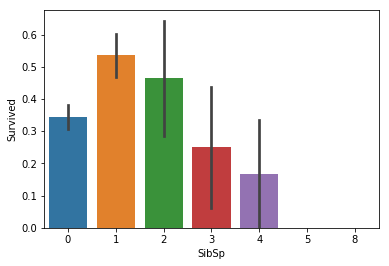

In [34]:
#SibSp, Parch
sns.barplot(x='SibSp', y='Survived', data=train_data);

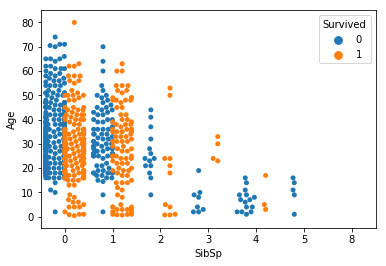

In [35]:
sns.swarmplot(x='SibSp', y='Age',
               hue='Survived', data=train_data, dodge=True);

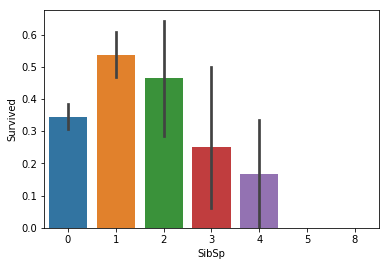

In [36]:
#SibSp, Parch
sns.barplot(x='SibSp', y='Survived', data=train_data)

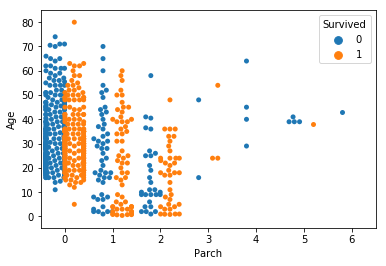

In [37]:
sns.swarmplot(x='Parch', y='Age',
               hue='Survived', data=train_data, dodge=True)

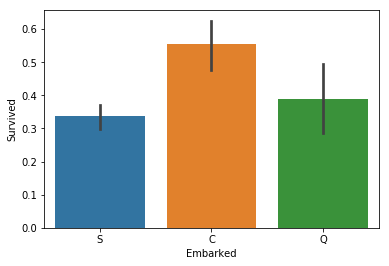

In [38]:
sns.barplot(x='Embarked', y='Survived', data=train_data, dodge=True);

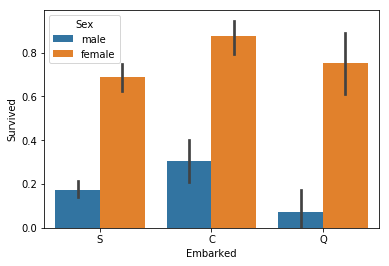

In [39]:
sns.barplot(x='Embarked', y='Survived', hue='Sex',data=train_data, dodge=True);

## 4. Data cleaning

In [40]:
## drop non-correlated features 
train_df = train_data.drop(['PassengerId'], axis=1)
test_df = test_data.copy() # keep PassengerId for now, for submission
data_dfs = [train_df, test_df]

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
# remove NaN: Age, Cabin, Embarked
for df in data_dfs:
    df['AgeMissing'] = df.Age.isna().astype(int)
    df.Age.fillna(value=0, inplace=True)
    df.Fare.fillna(value=0, inplace=True)
    df.Cabin.fillna(value='missing', inplace=True)
    df.dropna(subset=['Embarked'], inplace=True)
# X_train['AgeMissing'] = X_train.Age.isna()
# X_train.Age.fillna(value=0, inplace=True)
# X_train.Cabin.fillna(value='missing', inplace=True)
# X_train.Embarked.fillna(value='missing', inplace=True)

# X_test['AgeMissing'] = X_test.Age.isna()
# X_test.Age.fillna(value=0, inplace=True)
# X_test.Cabin.fillna(value='missing', inplace=True)
# X_test.Embarked.fillna(value='missing', inplace=True)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Name          889 non-null object
Sex           889 non-null object
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Ticket        889 non-null object
Fare          889 non-null float64
Cabin         889 non-null object
Embarked      889 non-null object
AgeMissing    889 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Feature Engineering

In [46]:
# drop features
# for df in data_dfs: 
#     df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [47]:
# replace name and ticket by its length
for df in data_dfs: 
    df['NameLen'] = df['Name'].str.len()
    df['TicketLen'] = df['Ticket'].str.len()

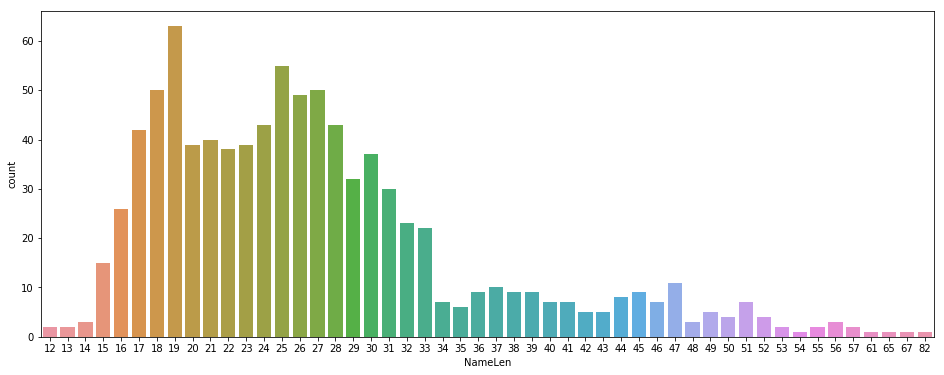

In [48]:
plt.figure(figsize=(16, 6))
sns.countplot('NameLen', data=train_df);

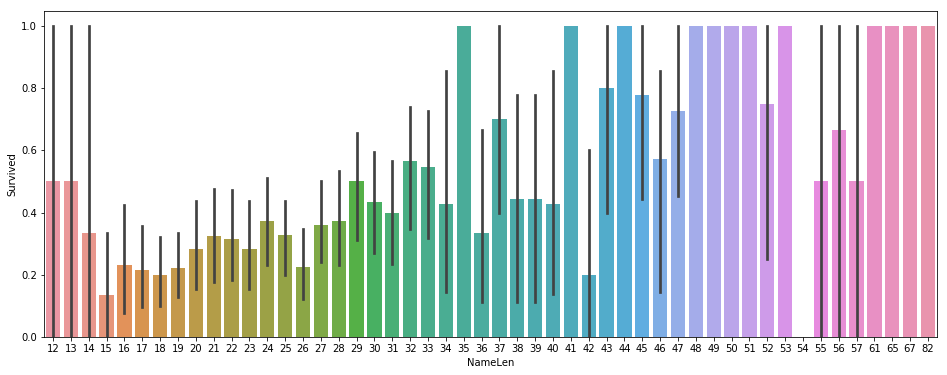

In [49]:
plt.figure(figsize=(16, 6))
sns.barplot(x='NameLen', y='Survived', data=train_df);

In [50]:
# for df in data_dfs: 
# #     df['NameLength'] = pd.cut(df.NameLength, bins=[0,15,30,45,100], labels=False) # group in bins

# df['NameLength'] = pd.cut(df['NameLength'], 5)

for df in data_dfs:    
    df.loc[ df['NameLen'] <= 20, 'NameLen'] = 0
    df.loc[(df['NameLen'] > 20) & (df['NameLen'] <= 30), 'NameLen'] = 1
    df.loc[(df['NameLen'] > 30) & (df['NameLen'] <= 40), 'NameLen'] = 2
    df.loc[(df['NameLen'] > 40), 'NameLen'] = 3

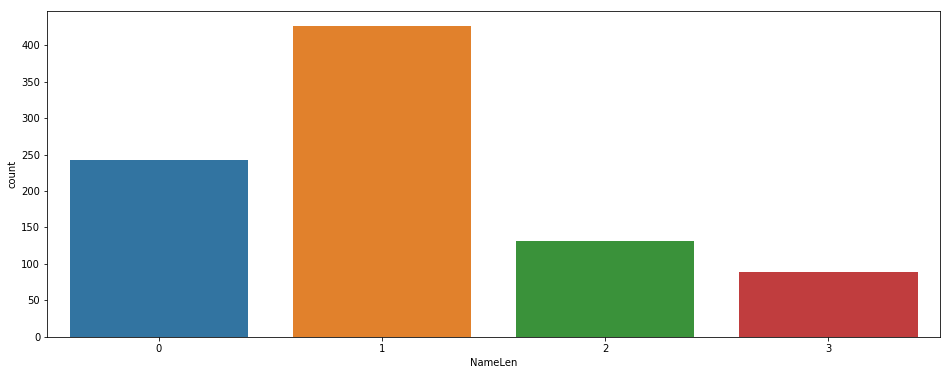

In [51]:
plt.figure(figsize=(16, 6))
sns.countplot('NameLen', data=train_df);

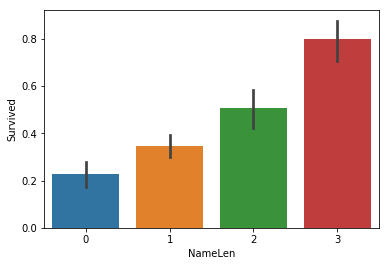

In [52]:
sns.barplot(x='NameLen', y='Survived', data=train_df);

In [53]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMissing,NameLen,TicketLen
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,0,1,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,3,8
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,0,1,16
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,6
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,0,1,6


In [54]:
for df in data_dfs:
    df.drop(['Name'], axis=1, inplace=True)

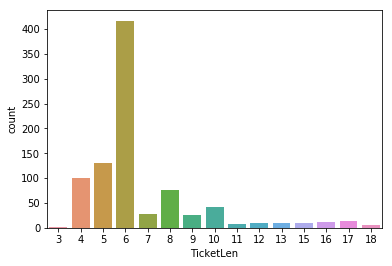

In [55]:
sns.countplot('TicketLen', data=train_df);

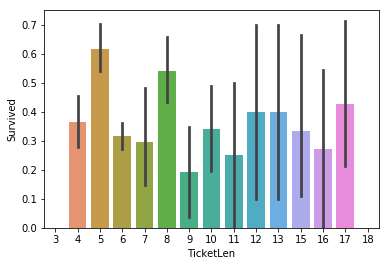

In [56]:
sns.barplot(x='TicketLen', y='Survived', data=train_df);

In [57]:
for df in data_dfs:    
    df.loc[ df['TicketLen'] <= 5, 'TicketLen'] = 0
    df.loc[(df['TicketLen'] > 5) & (df['TicketLen'] <= 10), 'TicketLen'] = 1
    df.loc[(df['TicketLen'] > 10), 'TicketLen'] = 2
# X_train['TicketLength'] = pd.cut(X_train.TicketLength, bins=[0,5,7,20], labels=False) 
# X_test['TicketLength'] = pd.cut(X_test.TicketLength, bins=[0,5,7,20], labels=False) 

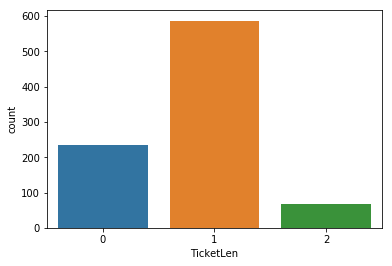

In [58]:
sns.countplot('TicketLen', data=train_df);

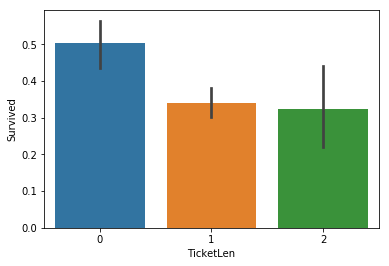

In [59]:
sns.barplot(x='TicketLen', y='Survived', data=train_df);

In [60]:
# Ticket and TicketLen features seems uncorrelated to target, drop it:
for df in data_dfs:
    df.drop(['Ticket', 'TicketLen'], axis=1, inplace=True)

In [61]:
# # simplify cabin feature to boolean
for df in data_dfs:
    df['hasCabin'] = (df['Cabin'] != 'missing').astype(int)
#     df['Cabin'] = df['Cabin'].str[0]

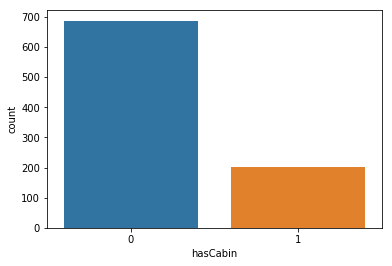

In [62]:
sns.countplot('hasCabin', data=train_df);

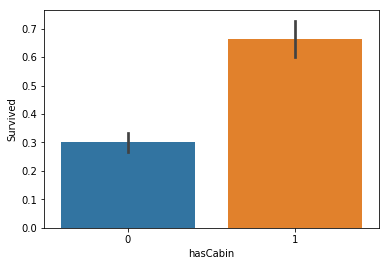

In [63]:
sns.barplot(x='hasCabin', y='Survived', data=train_df);

In [64]:
for df in data_dfs:
    df.drop(['Cabin'], axis=1, inplace=True)

In [65]:
for df in data_dfs:
    df['isFemale'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    df.drop(['Sex'], axis=1, inplace=True)
    
for df in data_dfs:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q':2} ).astype(int)

In [66]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,AgeMissing,NameLen,hasCabin,isFemale
0,0,3,22.0,1,0,7.2500,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,3,1,1
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,3,1,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0


## Algorithm selection

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [68]:
y_train = train_df['Survived']
X_train = train_df.drop(['Survived'], axis=1)
X_test = test_df
passengerIds = X_test['PassengerId']
X_test = X_test.drop(['PassengerId'], axis=1)
X_train.shape, y_train.shape, X_test.shape

((889, 10), (889,), (418, 10))

In [69]:
hyperparameters = dict(criterion=['gini','entropy'],
                       n_estimators=[10, 100, 250, 500],
                       max_features=['auto', 'sqrt', 'log2'],
                       max_depth=[None, 3, 5, 10],
                  )

In [70]:
pipe = ensemble.RandomForestClassifier(n_estimators=100)
# clf = GridSearchCV(estimator=pipe,param_grid=hyperparameters,cv=3)
clf = pipe

In [71]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,AgeMissing,NameLen,hasCabin,isFemale
0,3,22.0,1,0,7.2500,0,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,3,1,1
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,3,1,1
4,3,35.0,0,0,8.0500,0,0,1,0,0


In [72]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,AgeMissing,NameLen,hasCabin,isFemale
0,3,34.5,0,0,7.8292,2,0,0,0,0
1,3,47.0,1,0,7.0000,0,0,2,0,1
2,2,62.0,0,0,9.6875,2,0,1,0,0
3,3,27.0,0,0,8.6625,0,0,0,0,0
4,3,22.0,1,1,12.2875,0,0,3,0,1


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
AgeMissing    418 non-null int64
NameLen       418 non-null int64
hasCabin      418 non-null int64
isFemale      418 non-null int64
dtypes: float64(2), int64(8)
memory usage: 35.9 KB


In [74]:
X_train.columns.values

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeMissing', 'NameLen', 'hasCabin', 'isFemale'], dtype=object)

In [75]:
X_test.columns.values

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeMissing', 'NameLen', 'hasCabin', 'isFemale'], dtype=object)

In [76]:
## check that dataframes contain same columns (same features)
X_train.columns.values == X_test.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [77]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
# clf.best_score_
# clf.best_estimator_.score_
# print(clf.best_params_)
# print(clf.refit) 

In [79]:
y_train_pred = clf.predict(X_train)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_train, y_train_pred)

0.9898762654668166

In [82]:
y_test_pred = clf.predict(X_test)

In [83]:
y_test_pred[:20]
#array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [84]:
predictions = pd.concat([passengerIds,
                         pd.DataFrame({'Survived':y_test_pred})],
                         axis=1)

In [85]:
predictions.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [86]:
predictions.to_csv('titanic_predictions.csv', index=False)

In [87]:
# TODO: check order of rows (used for submission)
test_data_pred = pd.concat([X_test,
                         pd.DataFrame({'Survived':y_test_pred})],
                         axis=1)
train_data_pred = pd.concat([X_train,
                         pd.DataFrame({'Survived':y_train_pred})],
                         axis=1)
train_data_truth = pd.concat([X_train,
                         pd.DataFrame({'Survived':y_train})],
                         axis=1)

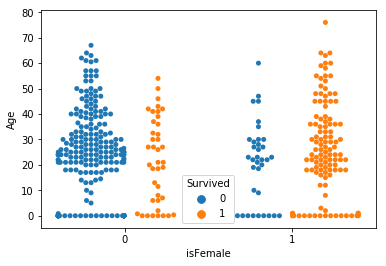

In [88]:
sns.swarmplot(x='isFemale', y='Age', hue='Survived', data=test_data_pred, dodge=True);

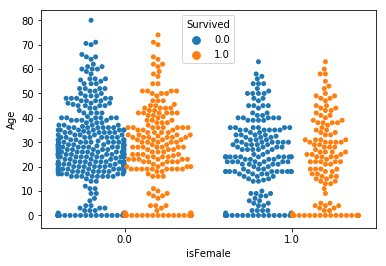

In [89]:
sns.swarmplot(x='isFemale', y='Age', hue='Survived', data=train_data_pred, dodge=True);

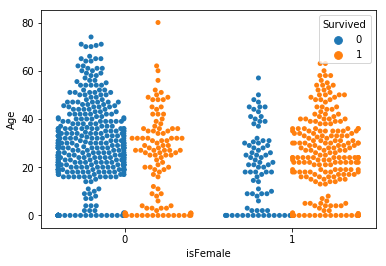

In [90]:
sns.swarmplot(x='isFemale', y='Age', hue='Survived', data=train_data_truth, dodge=True);